# EDA.Part II.1

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Рабочий стол\\chistoe.csv")
df = df.drop('Unnamed: 0',axis=1)
df.columns = map(str.capitalize,df.columns)

C:\Users\user\AppData\Local\Temp\ipykernel_28736\1940763671.py:1: DtypeWarning:

Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.



# II. Категориальные признаки

### На этапе исследования датасета, мы уже обнаружили, что большое количество переменных - категориальные, именно поэтому они представляют интерес в первую очередь. Давайте покапаемся в них,рассмотрим определённые из них в отдельности, а затем проанализируем, есть ли какие-либо закономерности и связи.

- ### Disorder_type

> #### Эта переменная говорит о том, какой вид насилия имел место в том или ином конфликте. Посмотрим на то, какие именно разновидности (и их количество) насилия содержатся в наших данных:

In [3]:
a = len(df['Disorder_type'].unique()) 
print(f'{a} вида насилия содержится в данных')

4 вида насилия содержится в данных


In [4]:
b = df['Disorder_type'].unique()
print(f'Виды насилия:',*b,sep = '\n')

Виды насилия:
Political violence
Demonstrations
Strategic developments
Political violence; Demonstrations


#### Разновидностей насилия не так уж и много, но давайте посмотрим, какая(-ие) из них доминируют?

Text(0.5, 1.0, 'Гистограмма типов насилия')

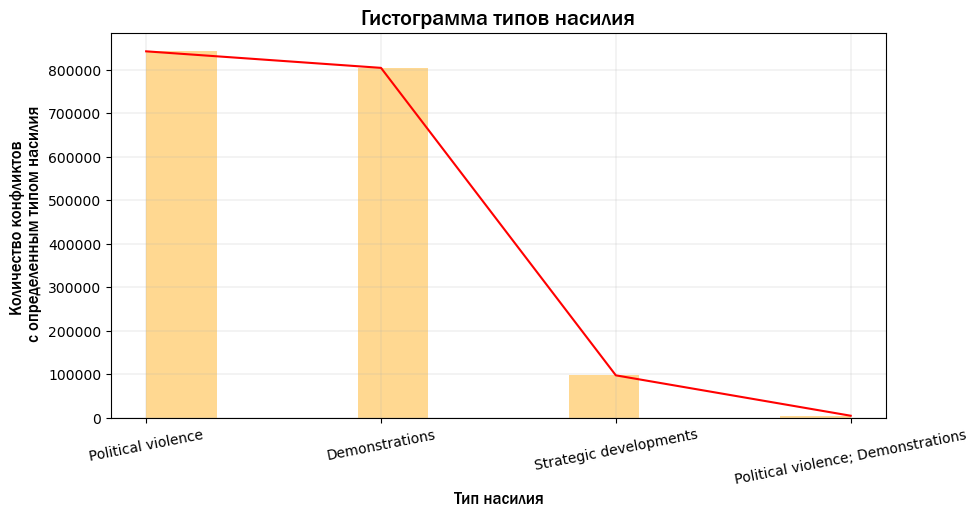

In [21]:
plt.figure(figsize=(10,5))
plt.grid(True,linewidth=0.2)
plt.plot(df['Disorder_type'].value_counts(),color='red')
plt.hist(df['Disorder_type'],alpha = 0.43,color='orange')
plt.xticks(rotation=11)
plt.xlabel('Тип насилия',fontname='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Количество конфликтов \n с определенным типом насилия',fontname='Franklin Gothic Medium',fontsize=12)
plt.title('Гистограмма типов насилия',fontname='Franklin Gothic Medium',fontsize=16)

#### Как можно увидеть, подавляющее большинство конфликтов: Political violence и Demonstrations

- ### Event_type

> #### Эта переменная содержит информацию о том, какой конфликт происходил, аналогично, посмотрим на разновидности( и их количество) конфликтов.

In [6]:
a = len(df['Event_type'].unique())
print(f'{a} видов конфликта содержится в данных')

6 видов конфликта содержится в данных


In [7]:
b = df['Event_type'].unique()
print(f'Виды конфликтов:',*b,sep='\n')

Виды конфликтов:
Violence against civilians
Battles
Explosions/Remote violence
Protests
Strategic developments
Riots


#### И теперь давайте посмотрим на распределение этих видов конфликтов в нашей таблице:

Text(0.5, 1.0, 'Гистограмма типов конфликта')

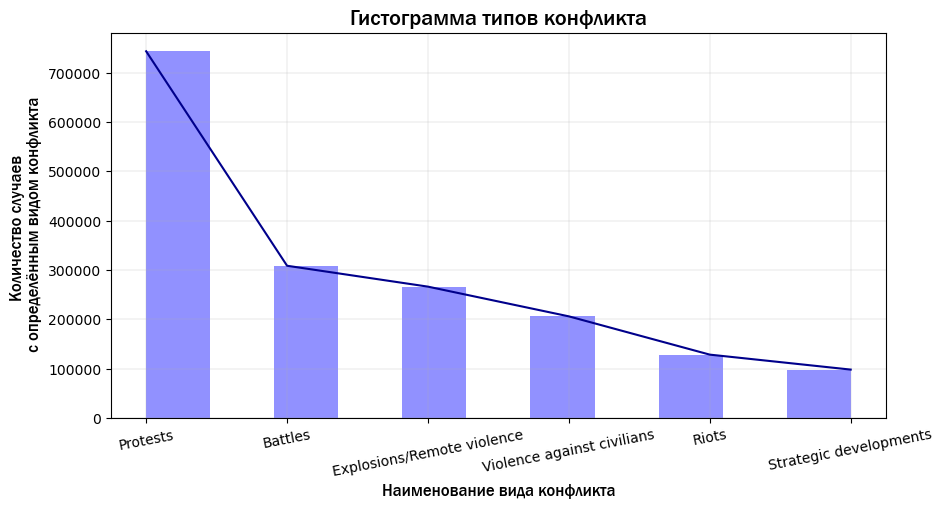

In [26]:
plt.figure(figsize=(10,5))
plt.grid(True,linewidth=0.2)
plt.plot(df['Event_type'].value_counts(),color='#00008B')
plt.hist(df['Event_type'],alpha = 0.43,bins=11,color='blue')
plt.xticks(rotation=11)
plt.xlabel('Наименование вида конфликта',fontname='Franklin Gothic Medium',fontsize=12)
plt.ylabel('Количество случаев \n с определённым видом конфликта',fontname='Franklin Gothic Medium',fontsize=12)
plt.title('Гистограмма типов конфликта',fontname='Franklin Gothic Medium',fontsize=16)

#### Можем заметить, что значительно доминируют протесты

- ### Sub_event_type

> #### Переменная, содержащая информацию о том, какой вспомогательный тип события происходил. То есть, какими действиями сопровождался основной конфликт

#### Все действия аналогичны тем, что были в прошлых пунктах

In [27]:
a = len(df['Sub_event_type'].unique())
print(f'{a} видов вспомогательных событий существует в данных')

25 видов вспомогательных событий существует в данных


In [28]:
b = df['Sub_event_type'].unique()
print(f'Вид вспомогательного события:',*b,sep='\n')

Вид вспомогательного события:
Attack
Armed clash
Remote explosive/landmine/IED
Shelling/artillery/missile attack
Peaceful protest
Change to group/activity
Looting/property destruction
Government regains territory
Disrupted weapons use
Protest with intervention
Violent demonstration
Mob violence
Air/drone strike
Other
Arrests
Excessive force against protesters
Abduction/forced disappearance
Suicide bomb
Grenade
Non-violent transfer of territory
Headquarters or base established
Agreement
Non-state actor overtakes territory
Sexual violence
Chemical weapon


#### Как мы видим, видов очень много, так что давайте посмотрим на них в пузырьковой диаграмме:

In [29]:
c = pd.DataFrame(df['Sub_event_type'].value_counts())
c = c.reset_index(drop=False)

### Диаграмма интерактивна, вы можете навести на каждый "пузырь" и посмотреть, какое количество конкретного вспомогательного события имело место в данных.

In [30]:
plt.figure(figsize=(15,9))
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(
    x=c['index'],
    y=c['Sub_event_type'],
    mode='markers',
    marker=dict(
        color=[120,121,122,123,124,125, 126,127,128, 129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144],
        size=[40, 39, 38, 37, 36, 35,34, 33, 32, 31, 30, 29,28, 27, 26, 25, 24, 23,22,21,20,19,18,17,16],
        showscale=True
        )
)])
fig.update_layout(
    title='Диаграмма распределения типов вспомогательного события',
    xaxis=dict(
        title='Тип вспомогательного события'),
    yaxis=dict(
        title='Count'))

fig.show()

<Figure size 1500x900 with 0 Axes>

#### Итак, самый популярный из всех вид вспомогательного события: Peaceful protest

> ### На самом деле, оставшиеся категориальные переменные(например, Notes, Tags e.t.c) мало интересны и склонны к анализу. Но хочется посмотреть на определенные признаки вместе, что мы и сделаем далее